In this notebook will be shown how to use the DynamicNetwork module to create models that can mutate.
The module contains the DynamicNetwork class, which we'll use to create our players, the compete function, which we'll use to make the players compete against each other, and it contains the test and train function.
First, we'll import our datasets


In [1]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import random as rd
import numpy as np


train_data=datasets.CIFAR10(
    root="data",#Root of the data, if downloaded
    train=True, 
    download=True, #Wether do download or not. Downloads at root directory
    transform=ToTensor() #Transforms the data to tensors
)


test_data=datasets.CIFAR10(
    root="data",#Root of the data, if downloaded
    train=False,
    download=True, #Wether do download or not. Downloads at root directory
    transform=ToTensor() #Transforms the data to tensors
)
    
batch_size=64

train_dataloader=DataLoader(train_data, batch_size=batch_size) #Wraps an iterable around the data
test_dataloader = DataLoader(test_data, batch_size=batch_size)

lin_input=28*28
nb_of_labels=10

Files already downloaded and verified
Files already downloaded and verified


Here we import the train and test function from the DynamicNetwork module, as well as the DynamicNetwork class. The train and test function are basic loops found on the PyTorch website's tutorial page and are included as built in functions in the DynamicNetwrok modules simply for quality of life. The DynamicNetwork class countains multiple methods which all apply a specified mutation.  For exemple, the add_linear_layer method adds a new linear layer to the neural network, at a random location and with a random number of neurones. The evolve method simply apply a random mutation.

In [2]:
from DynamicNetwork import DynamicNetwork, train, test
from torch.optim import SGD
nb_of_players=15
nb_of_epochs=5
players=[]

for i in range(nb_of_players):
    player=DynamicNetwork(dummy=train_data[0][0], nb_of_labels=10)
    player.evolve()
    optimizer=SGD(player.parameters(), lr=player.learning_rate)
    
    for epoch in range(nb_of_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train(train_dataloader, player, player.loss_fn, optimizer)
        test(test_dataloader, player, player.loss_fn)
    player.score=test(test_dataloader, player, player.loss_fn)
    players.append(player)



Mutation #1 took places
Epoch 1
-------------------------------
loss: 2.298507  [   64/50000]
loss: 2.276203  [ 6464/50000]
loss: 2.088841  [12864/50000]
loss: 2.116858  [19264/50000]
loss: 2.065986  [25664/50000]
loss: 2.020677  [32064/50000]
loss: 2.076139  [38464/50000]
loss: 1.987931  [44864/50000]
Test Error: /n Accuracy: 31.8%, Avg loss: 1.898991/n
Epoch 2
-------------------------------
loss: 1.897938  [   64/50000]
loss: 1.861564  [ 6464/50000]
loss: 1.657077  [12864/50000]
loss: 1.820445  [19264/50000]
loss: 1.998962  [25664/50000]
loss: 1.844480  [32064/50000]
loss: 1.875611  [38464/50000]
loss: 1.787575  [44864/50000]
Test Error: /n Accuracy: 36.9%, Avg loss: 1.777913/n
Epoch 3
-------------------------------
loss: 1.734334  [   64/50000]
loss: 1.668790  [ 6464/50000]
loss: 1.475249  [12864/50000]
loss: 1.735761  [19264/50000]
loss: 1.788258  [25664/50000]
loss: 1.765546  [32064/50000]
loss: 1.736616  [38464/50000]
loss: 1.694604  [44864/50000]
Test Error: /n Accuracy: 37.4%

Here we import the compete function from the DyanamicNetwork module. This methods takes two players and make them compete: the one with the highest score on the given dataset is kept and a copy, the "infant", of is made of it. The player with the lowest score is deleted and a random mutation is applied to the infant. The infant inherits the weight of the parent and only the layers on which a mutation as been applied are trained. The compete function takes as argument the two players which are competing, the number of epochs, and the given train and test dataLoader.

In [ ]:
from DynamicNetwork import compete
nb_of_games=200

#The following array will be used n order to keep track of the score of the population after each game
scores=np.zeros((nb_of_players,nb_of_games+1))

for index, player in enumerate(players):
    scores[index][0]=player.score[0]
    

for i in range(nb_of_games):
    
    a=rd.randint(0,9)
    b=rd.randint(0,9)

    while b==a:
        b=rd.randint(0,9)

    playerA=players[a]
    playerB=players[b]

    print(f"Start of game {i+1}\n PlayerA is #{a} and playerB is #{b}")
    playerA, playerB=compete(playerA, playerB, nb_of_epochs=nb_of_epochs, train_dataloader=train_dataloader, test_dataloader=test_dataloader)
    players[a]=playerA
    players[b]=playerB

    #Now we update the scores of the players in the array
    for index, player in enumerate(players):
        scores[index][i]=player.score[0]
    


Start of game 1
 PlayerA is #8 and playerB is #5
Mutation #4 took places
Start of game 2
 PlayerA is #3 and playerB is #5
Mutation #3 took places
debug mutation equals (3, 2)
player1 looks like DynamicNetwork(
  (conv_skeleton): ModuleList()
  (linear_skeleton): ModuleList(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=461, bias=True)
    (2): Linear(in_features=461, out_features=1022, bias=True)
    (3): Linear(in_features=1022, out_features=512, bias=True)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
  (loss_fn): CrossEntropyLoss()
)
Epoch 1
-------------------------------
loss: 2.273093  [   64/50000]
loss: 1.622818  [ 6464/50000]
loss: 1.382457  [12864/50000]
loss: 1.736874  [19264/50000]
loss: 1.538474  [25664/50000]
loss: 1.585905  [32064/50000]
loss: 1.568551  [38464/50000]
loss: 1.564339  [44864/50000]
Test Error: /n Accuracy: 39.9%, Avg loss: 1.687966/n
Epoch 2
-------------------------------
loss: 1.694195  [   64

Here we will visualize the evolution of the scores of our population using matplotlib.pyplot

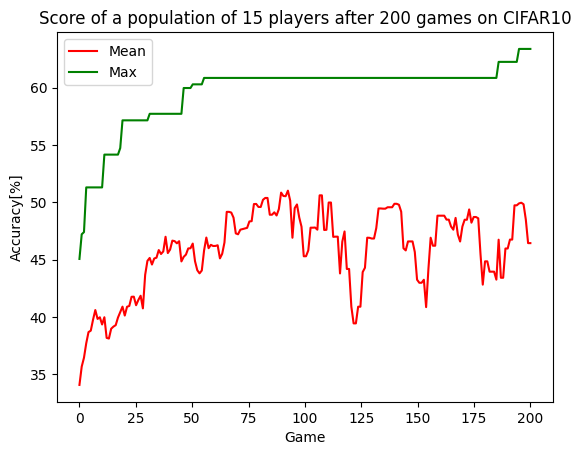

In [10]:

import matplotlib.pyplot as plt

mean=[]
max=[]
for i in range(0,nb_of_games):
    mean.append(np.mean(scores[:,i]))

for i in range(0,nb_of_games):
    max.append(np.max(scores[:,i]))



fig=plt.figure()
plt.plot(np.linspace(0,200,200),np.array(mean),color="red", label="Mean")
plt.plot(np.linspace(0,200,200),np.array(max),color="green", label="Max")
plt.legend()
plt.xlabel("Game")
plt.ylabel("Accuracy[%]")
plt.title("Score of a population of 15 players after 200 games on CIFAR10")
plt.savefig("200games_15players_5epochs_CIFAR10.jpeg")

